In [211]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.metrics import plot_confusion_matrix

In [212]:
trainPath='train.csv'
trainDat=pd.read_csv(trainPath)

testPath='test.csv'
testDat=pd.read_csv(testPath)


In [213]:
#Cleaning Data

trainDat.Sex = pd.Categorical(trainDat.Sex)
trainDat.Embarked = pd.Categorical(trainDat.Embarked)
trainDat['Sex'] = trainDat.Sex.cat.codes
trainDat['Embarked'] = trainDat.Embarked.cat.codes

trainDat.drop(['Name', 'Cabin','Ticket','PassengerId'], axis=1,inplace=True)
trainDat.dropna(inplace=True)

#converting categorical data to numbers
testDat.Sex = pd.Categorical(testDat.Sex)
testDat.Embarked = pd.Categorical(testDat.Embarked)
testDat['Sex'] = testDat.Sex.cat.codes
testDat['Embarked'] = testDat.Embarked.cat.codes

testDat.drop(['Name', 'Cabin','Ticket','PassengerId'], axis=1,inplace=True)
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#impute
testDat.Age = imp_mean.fit_transform(testDat['Age'].values.reshape(-1,1))[:,0]
testDat.Fare = imp_mean.fit_transform(testDat['Fare'].values.reshape(-1,1))[:,0]

In [214]:
trainDat

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
885,0,3,0,39.0,0,5,29.1250,1
886,0,2,1,27.0,0,0,13.0000,2
887,1,1,0,19.0,0,0,30.0000,2
889,1,1,1,26.0,0,0,30.0000,0


     Survived
Sex          
0    0.754789
1    0.205298


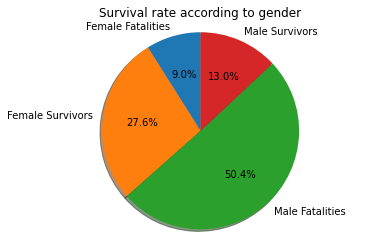

In [215]:
#Genderwise
femaleDat = trainDat[trainDat['Sex'] == 0]
s0=femaleDat['Survived'].value_counts()
maleDat = trainDat[trainDat['Sex'] == 1]
s1=maleDat['Survived'].value_counts()
print(trainDat[['Sex', 'Survived']].groupby(['Sex']).mean())

# Pie chart
labels = 'Female Fatalities', 'Female Survivors', 'Male Fatalities', 'Male Survivors'
sizes = [s0[0],s0[1],s1[0],s1[1]]

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
ax1.set_title('Survival rate according to gender')

plt.show()

In [216]:
#Classwise
trainDat[['Survived', 'Sex', 'Pclass']].groupby(['Pclass', 'Sex']).mean()

Survived
Pclass Sex          
1      0    0.964706
       1    0.396040
2      0    0.918919
       1    0.151515
3      0    0.460784
       1    0.150198

<AxesSubplot:ylabel='Frequency'>

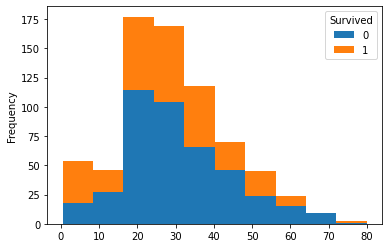

In [217]:
#Agewise
trainDat.pivot(columns='Survived').Age.plot(kind = 'hist', stacked=True)

In [218]:
X_train = trainDat[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']]             #input variables
Y_train = trainDat[['Survived']]    #output vairables

X_test = testDat[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare','Embarked']]         

In [219]:
#Logistic regressions
regr = LogisticRegression()
regr.fit(X_train, Y_train)
#getting coefficients from multivariate regressions
coeff=regr.coef_
print(regr.coef_)

[[-1.17399978e+00 -2.49317469e+00 -4.21036350e-02 -3.44370406e-01
  -4.79212015e-02  1.68650463e-03 -1.81595704e-01]]


C:\Users\ROHITH\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\ROHITH\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


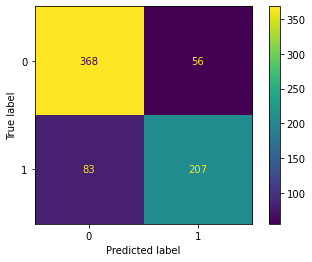

In [220]:
plot_confusion_matrix(regr, X_train, Y_train)

In [221]:
#Accuracy
regr.score(X,Y)

0.8053221288515406

In [222]:
#predicting on test data
Y_pred=regr.predict(X_test)

In [223]:
Y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [224]:
#percentage of survivors in predictions
Y_pred.mean()

0.3875598086124402

In [225]:
testDat['Pred_surv']=Y_pred
testDat

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Pred_surv
0,3,1,34.50000,0,0,7.8292,1,0
1,3,0,47.00000,1,0,7.0000,2,0
2,2,1,62.00000,0,0,9.6875,1,0
3,3,1,27.00000,0,0,8.6625,2,0
4,3,0,22.00000,1,1,12.2875,2,1
...,...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2,0
414,1,0,39.00000,0,0,108.9000,0,1
415,3,1,38.50000,0,0,7.2500,2,0
416,3,1,30.27259,0,0,8.0500,2,0


In [226]:
testDat.to_csv('predData.csv',index=False)